Model katsayıları: [[ 0.         21.50147379 -8.90613825]]
Model sabit terimi: [3.94612515]
Ortalama Kare Hatası (MSE): 0.6840105233984024


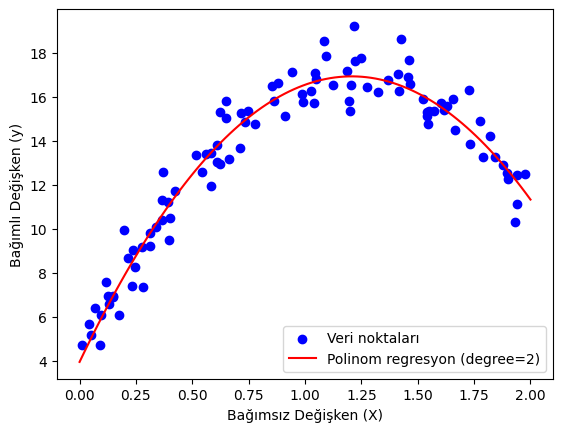

In [1]:
# Polinom Regrasyon

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Örnek veri seti oluşturalım
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1) + 10 * np.sin(1.5 * X)

# Veri setini eğitim ve test olarak ayıralım
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Polinom özellikleri oluşturalım (derece 2)
poly_features = PolynomialFeatures(degree=2)
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.transform(X_test)

# Polinom regresyon modelini oluşturalım ve eğitelim
poly_reg = LinearRegression()
poly_reg.fit(X_poly_train, y_train)

# Modelin tahminlerini test veri seti üzerinde yapalım
y_poly_pred = poly_reg.predict(X_poly_test)

# Modelin katsayılarını ve sabit terimini yazdıralım
print(f"Model katsayıları: {poly_reg.coef_}")
print(f"Model sabit terimi: {poly_reg.intercept_}")

# Hata metriğini hesaplayalım
mse_poly = mean_squared_error(y_test, y_poly_pred)
print(f"Ortalama Kare Hatası (MSE): {mse_poly}")

# Eğitim veri seti ve modelin polinom regresyon eğrisini görselleştirelim
plt.scatter(X, y, color='blue', label='Veri noktaları')
X_range = np.linspace(0, 2, 100).reshape(100, 1)
X_range_poly = poly_features.transform(X_range)
plt.plot(X_range, poly_reg.predict(X_range_poly), color='red', label='Polinom regresyon (degree=2)')
plt.xlabel('Bağımsız Değişken (X)')
plt.ylabel('Bağımlı Değişken (y)')
plt.legend()
plt.show()